# Speech Emotion Recognition – Preprocessing
## Notebook 4: Outlier Detection & Removal

**Registratoin Number:** IT24102795  
**Task:** Detect and Remove Outliers in the Dataset.  
**Objective:** Ensure Extreme Values do not negatively impact the Model.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Convert to DataFrame
We will convert the feature matrix into a DataFrame so we can explore feature distributions.

In [58]:
df = pd.DataFrame(X[:, :10], columns=[f"F{i}" for i in range(1, 11)])
df["Emotion"] = y
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Emotion
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,neutral
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,neutral
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,neutral
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,neutral
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,calm


### Step 3: Visualize Outliers with Boxplots
Boxplots show the spread of data and highlight extreme values (outliers).

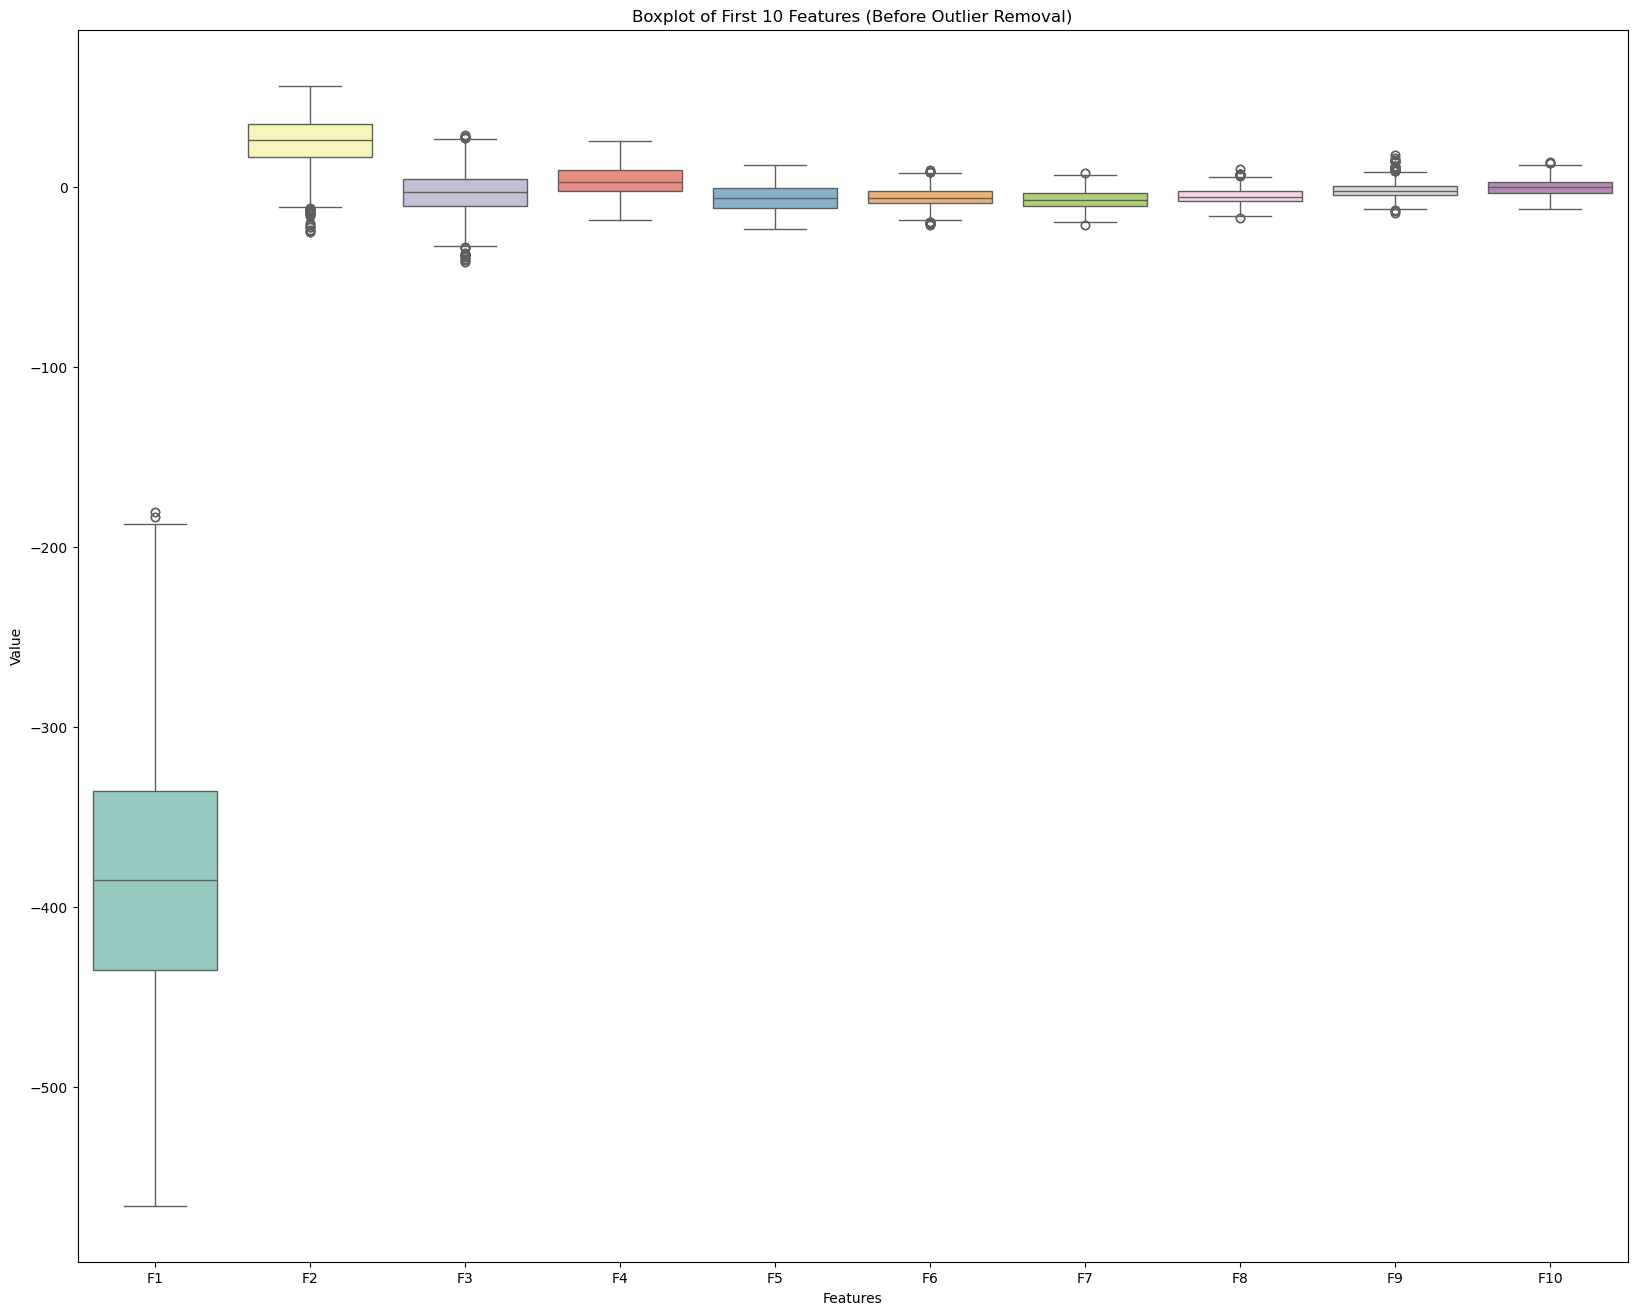

In [59]:
plt.figure(figsize=(20,16))
sns.boxplot(data=df.drop(columns=["Emotion"]), palette="Set3")
plt.title("Boxplot of First 10 Features (Before Outlier Removal)")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

### Step 4: Detect Outliers using Z-Score
Any value with a z-score > 3 (or < -3) is considered an outlier.

In [60]:
z_scores = np.abs(stats.zscore(df.drop(columns=["Emotion"])))
print("Z-Scores Shape:", z_scores.shape)

outlier_rows_z_score_method = (z_scores > 3).any(axis=1)
print("Outliers detected using Z-Score:", outlier_rows_z_score_method.sum())

Z-Scores Shape: (2870, 10)
Outliers detected using Z-Score: 48


### Step 5: Remove Outliers using Z-Score
We will drop rows that contain extreme values using Z-Score.

In [61]:
df_clean_z_score_method = df[~outlier_rows_z_score_method]
print("Original dataset size:", df.shape[0])
print("Cleaned dataset size:", df_clean_z_score_method.shape[0])

Original dataset size: 2870
Cleaned dataset size: 2822


### Step 6: Visualize Again After Removal using Z-Score

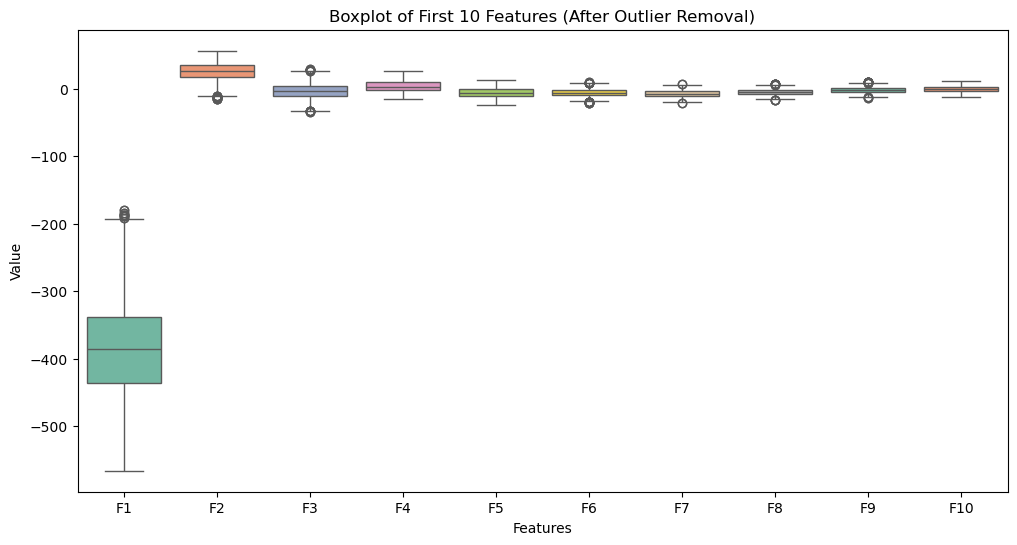

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean_z_score_method.drop(columns=["Emotion"]), palette="Set2")
plt.title("Boxplot of First 10 Features (After Outlier Removal)")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

### Step 7: Detect Outliers using IQR Method (For Demonstration)
(Any value > Upper Bould) OR (Any Value < Lower Bound) is considered an outlier.

In [63]:
Q1 = df.drop(columns="Emotion").quantile(0.25)
Q3 = df.drop(columns="Emotion").quantile(0.75)
IQR = Q3 - Q1

condition = ((df.drop(columns="Emotion") < (Q1 - 1.5 * IQR)) | (df.drop(columns="Emotion") > (Q3 + 1.5 * IQR)))
print("IQR Method Outlier Find Condition Shape:", condition.shape)

outlier_rows_IQR_method = condition.any(axis=1)
print("Outliers detected using IQR Method:", outlier_rows_IQR_method.sum())

IQR Method Outlier Find Condition Shape: (2870, 10)
Outliers detected using IQR Method: 132


### Step 8: Remove Outliers using IQR Method (For Demonstration)
We will drop rows that contain extreme values using IQR Method.

In [64]:
df_clean_IQR_method = df[~outlier_rows_IQR_method]

print("Original dataset size:", df.shape[0])
print("Cleaned dataset size:", df_clean_IQR_method.shape[0])

Original dataset size: 2870
Cleaned dataset size: 2738


### Step 9: Visualize Again After Removal using IQR Method (For Demonstration)

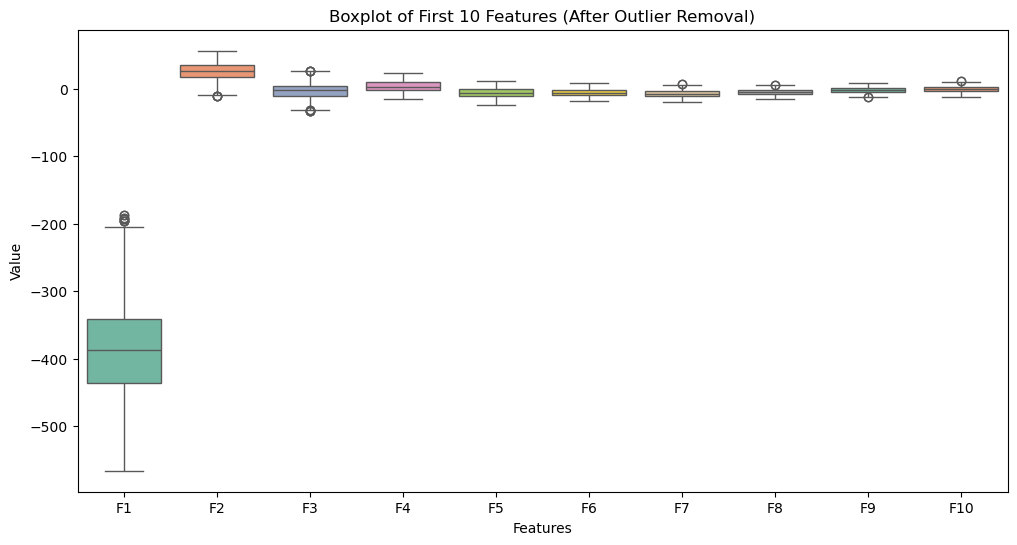

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean_IQR_method.drop(columns=["Emotion"]), palette="Set2")
plt.title("Boxplot of First 10 Features (After Outlier Removal)")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

# ✅ Conclusion
- Outliers can distort ML Models by pulling Decision Boundaries.  
- We identified Outliers using **Z-Score > 3** rule.
- We demonstrated how to find Outliers using **IQR Method** .
- Removed `48` Rows using **Z-Score Method**.  
- Dataset is now Cleaner and more Tobust for Training.